# Final Project 2 (PYTN-KS18)
##### Anggota Kelompok :
1. Abraham Linggom Tampubolon
2. Farhan Ihtifazhuddin
3. Meila Suci

# Perkenalan
#### A. Latar Belakang:
Kasus yang kita pilih dalam proyek ini adalah analisis cuaca harian di Australia selama sekitar 10 tahun terakhir. Australia adalah negara yang luas dengan iklim yang bervariasi. Cuaca dan hujan yang dapat diprediksi dengan baik memiliki dampak besar pada berbagai sektor, termasuk pertanian, pengelolaan sumber daya air, keamanan pangan, dan kesejahteraan masyarakat. Oleh karena itu, proyek ini bertujuan untuk dapat memprediksi terjadinya hujan di Australia berdasarkan data cuaca harian.

#### B. Data yang Digunakan:
Dataset yang digunakan dalam proyek ini adalah "weatherAUS.csv". Data yang digunakan berasal dari pengamatan cuaca harian yang dilakukan di berbagai lokasi di negara Australia. Dataset ini berisi informasi tentang atribut-atribut yang terkait dengan cuaca seperti tanggal, lokasi, minTemp, maxTemp, Evaporation, Sunshine, windgustdir (arah lonjakan angin), windgustspeed(kecepatan angin) dan atribut lainnya yang relevan. Dataset ini memiliki sejumlah kolom yang mencakup informasi yang relevan untuk analisis cuaca.

#### C. Objective yang Ingin Dicapai:
Tujuan dari proyek ini adalah untuk memprediksi apakah akan terjadi hujan besok atau tidak di Australia Dalam analisis ini, kita akan melihat hubungan antara atribut-atribut tertentu dalam dataset "weatherAUS.csv". Selain itu, kita juga akan mempersiapkan data untuk digunakan dalam model regresi logistik dan mesin vektor pendukung (SVM) dan mengimplementasikan model tersebut untuk membuat prediksi cuaca.

Dengan melakukan analisis ini, kita dapat mendapatkan pemahaman yang lebih baik tentang faktor-faktor yang mempengaruhi kemungkinan terjadinya hujan sehingga bisa mengambil tindakan preventif atau pengaturan rencana yang lebih baik., serta melihat sejauh mana model regresi logistik dan mesin vektor pendukung (SVM) dapat digunakan untuk membuat prediksi cuaca hujan yang akurat.

# Import pustaka
Berikut adalah daftar library yang akan digunakan dalam proyek ini:

In [1]:
import pandas as pd
import numpy as np #

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)

# Data Loading
Melakukan proses data loading dari dataset "weatherAUS.csv".

In [2]:
df = pd.read_csv("weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.40,22.90,0.60,NaN,NaN,W,44.00,W,WNW,20.00,24.00,71.00,22.00,1007.70,1007.10,8.00,NaN,16.90,21.80,No,No
1,2008-12-02,Albury,7.40,25.10,0.00,NaN,NaN,WNW,44.00,NNW,WSW,4.00,22.00,44.00,25.00,1010.60,1007.80,NaN,NaN,17.20,24.30,No,No
2,2008-12-03,Albury,12.90,25.70,0.00,NaN,NaN,WSW,46.00,W,WSW,19.00,26.00,38.00,30.00,1007.60,1008.70,NaN,2.00,21.00,23.20,No,No
3,2008-12-04,Albury,9.20,28.00,0.00,NaN,NaN,NE,24.00,SE,E,11.00,9.00,45.00,16.00,1017.60,1012.80,NaN,NaN,18.10,26.50,No,No
4,2008-12-05,Albury,17.50,32.30,1.00,NaN,NaN,W,41.00,ENE,NW,7.00,20.00,82.00,33.00,1010.80,1006.00,7.00,8.00,17.80,29.70,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.80,23.40,0.00,NaN,NaN,E,31.00,SE,ENE,13.00,11.00,51.00,24.00,1024.60,1020.30,NaN,NaN,10.10,22.40,No,No
145456,2017-06-22,Uluru,3.60,25.30,0.00,NaN,NaN,NNW,22.00,SE,N,13.00,9.00,56.00,21.00,1023.50,1019.10,NaN,NaN,10.90,24.50,No,No
145457,2017-06-23,Uluru,5.40,26.90,0.00,NaN,NaN,N,37.00,SE,WNW,9.00,9.00,53.00,24.00,1021.00,1016.80,NaN,NaN,12.50,26.10,No,No
145458,2017-06-24,Uluru,7.80,27.00,0.00,NaN,NaN,SE,28.00,SSE,N,13.00,7.00,51.00,24.00,1019.40,1016.50,3.00,2.00,15.10,26.00,No,No


In [3]:
# Melihat dimensi dataset
df.shape

(145460, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
# Mendeskripsikan variabel numerik
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.00,12.19,6.40,-8.50,7.60,12.00,16.90,33.90
MaxTemp,144199.00,23.22,7.12,-4.80,17.90,22.60,28.20,48.10
Rainfall,142199.00,2.36,8.48,0.00,0.00,0.00,0.80,371.00
Evaporation,82670.00,5.47,4.19,0.00,2.60,4.80,7.40,145.00
Sunshine,75625.00,7.61,3.79,0.00,4.80,8.40,10.60,14.50
WindGustSpeed,135197.00,40.04,13.61,6.00,31.00,39.00,48.00,135.00
WindSpeed9am,143693.00,14.04,8.92,0.00,7.00,13.00,19.00,130.00
WindSpeed3pm,142398.00,18.66,8.81,0.00,13.00,19.00,24.00,87.00
Humidity9am,142806.00,68.88,19.03,0.00,57.00,70.00,83.00,100.00
Humidity3pm,140953.00,51.54,20.80,0.00,37.00,52.00,66.00,100.00


In [6]:
# Mendeskripsikan variabel object
df.describe(include=object).T

,count,unique,top,freq
Date,145460,3436,2013-11-12,49
Location,145460,49,Canberra,3436
WindGustDir,135134,16,W,9915
WindDir9am,134894,16,N,11758
WindDir3pm,141232,16,SE,10838
RainToday,142199,2,No,110319
RainTomorrow,142193,2,No,110316


# Data Cleaning
Melakukan proses cleaning pada data, seperti memberi nama baru untuk setiap kolom, mengisi missing values, menghapus kolom yang tidak dipakai, dsb.



In [7]:
# Membuat variabel kategorik
categorical = [var for var in df.columns if df[var].dtype=='O']
print('Variabel kategorik :', categorical)

Variabel kategorik : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [8]:
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [9]:
# Memeriksa nilai yang hilang pada variabel kategorikal
df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [10]:
# Menampilkan variabel kategorikal yang mengandung nilai yang hilang
cat1 = [var for var in categorical if df[var].isnull().sum()!=0]

print(df[cat1].isnull().sum())

WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64


In [11]:
# Mengonversi tanggal yang saat ini dikodekan sebagai string ke dalam format datetime
df['Date'] = pd.to_datetime(df['Date'])


In [12]:
# Mengekstrak tahun dari kolom tanggal
df['Year'] = df['Date'].dt.year

# Menampilkan lima baris pertama dari kolom 'Year'
print(df['Year'].head())

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64


In [13]:
# Mengekstrak bulan dari kolom tanggal
df['Month'] = df['Date'].dt.month

# Menampilkan lima baris pertama dari kolom 'Month'
print(df['Month'].head())


0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64


In [14]:
# Mengekstrak hari dari kolom tanggal
df['Day'] = df['Date'].dt.day

# Menampilkan lima baris pertama dari kolom 'Day'
print(df['Day'].head())


0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64


In [15]:
# Definisi fungsi untuk mengonversi bulan menjadi musim
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

In [16]:
# Terapkan fungsi pada kolom bulan dan buat kolom musim
df['Season'] = df['Month'].apply(get_season)


In [17]:
# Menghapus variabel Date asli
df.drop('Date', axis=1, inplace=True)

In [18]:
df.dropna(inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       56420 non-null  object 
 1   MinTemp        56420 non-null  float64
 2   MaxTemp        56420 non-null  float64
 3   Rainfall       56420 non-null  float64
 4   Evaporation    56420 non-null  float64
 5   Sunshine       56420 non-null  float64
 6   WindGustDir    56420 non-null  object 
 7   WindGustSpeed  56420 non-null  float64
 8   WindDir9am     56420 non-null  object 
 9   WindDir3pm     56420 non-null  object 
 10  WindSpeed9am   56420 non-null  float64
 11  WindSpeed3pm   56420 non-null  float64
 12  Humidity9am    56420 non-null  float64
 13  Humidity3pm    56420 non-null  float64
 14  Pressure9am    56420 non-null  float64
 15  Pressure3pm    56420 non-null  float64
 16  Cloud9am       56420 non-null  float64
 17  Cloud3pm       56420 non-null  float64
 18  Te

In [20]:
# Memeriksa kolom yang memiliki missing value
pd.DataFrame(df.isna().sum())

,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0



Pada Heatmap diatas menunjukkan bahwa variabel Year, Month, Day tidak memiliki korelasi dengan yang lain sehingga perlu dihapus

In [21]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
MinTemp,1.00,0.75,0.11,0.51,0.08,0.12,0.11,0.14,-0.17,0.07,-0.48,-0.50,0.11,0.04,0.91,0.73,0.07,-0.19,0.00
MaxTemp,0.75,1.00,-0.07,0.65,0.46,0.04,-0.01,0.01,-0.50,-0.45,-0.35,-0.45,-0.26,-0.26,0.89,0.98,0.05,-0.16,0.00
Rainfall,0.11,-0.07,1.00,-0.08,-0.25,0.11,0.05,0.04,0.26,0.28,-0.18,-0.14,0.22,0.19,0.01,-0.07,-0.01,-0.03,0.01
Evaporation,0.51,0.65,-0.08,1.00,0.37,0.21,0.19,0.12,-0.55,-0.42,-0.30,-0.33,-0.20,-0.20,0.59,0.63,0.05,-0.05,-0.01
Sunshine,0.08,0.46,-0.25,0.37,1.00,-0.05,-0.01,0.03,-0.50,-0.63,0.04,-0.02,-0.68,-0.70,0.29,0.49,0.00,0.03,-0.00
WindGustSpeed,0.12,0.04,0.11,0.21,-0.05,1.00,0.61,0.69,-0.19,-0.04,-0.43,-0.38,0.09,0.13,0.09,-0.00,-0.02,0.04,-0.01
WindSpeed9am,0.11,-0.01,0.05,0.19,-0.01,0.61,1.00,0.50,-0.24,-0.06,-0.20,-0.16,0.03,0.06,0.05,-0.02,-0.02,0.05,-0.01
WindSpeed3pm,0.14,0.01,0.04,0.12,0.03,0.69,0.50,1.00,-0.10,0.03,-0.29,-0.25,0.07,0.04,0.11,-0.01,-0.03,0.06,-0.01
Humidity9am,-0.17,-0.50,0.26,-0.55,-0.50,-0.19,-0.24,-0.10,1.00,0.69,0.11,0.17,0.44,0.35,-0.42,-0.49,-0.01,-0.09,0.01
Humidity3pm,0.07,-0.45,0.28,-0.42,-0.63,-0.04,-0.06,0.03,0.69,1.00,-0.06,0.02,0.51,0.51,-0.15,-0.50,0.01,-0.03,0.01


# Explorasi Data

## Distribusi Rain Today

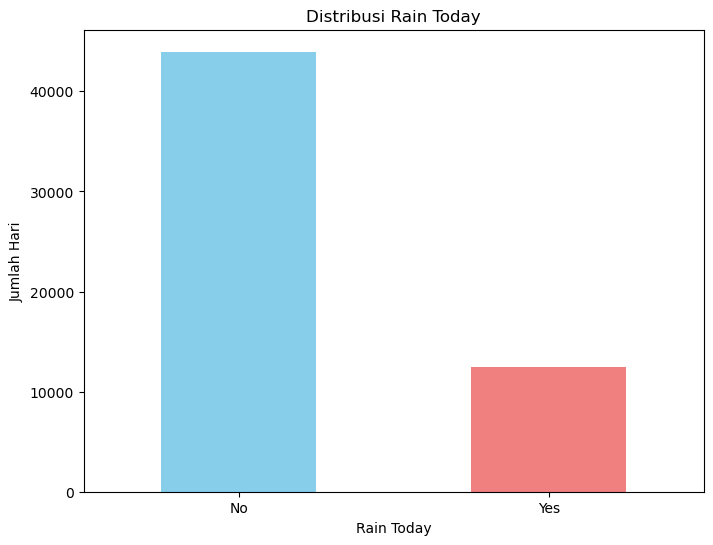

In [22]:
# Menghitung frekuensi RainToday
rain_today_counts = df['RainToday'].value_counts()

# Membuat bar plot
plt.figure(figsize=(8, 6))
rain_today_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribusi Rain Today')
plt.xlabel('Rain Today')
plt.ylabel('Jumlah Hari')
plt.xticks(rotation=0)
plt.show()

## Distribusi Rain Tomorrow

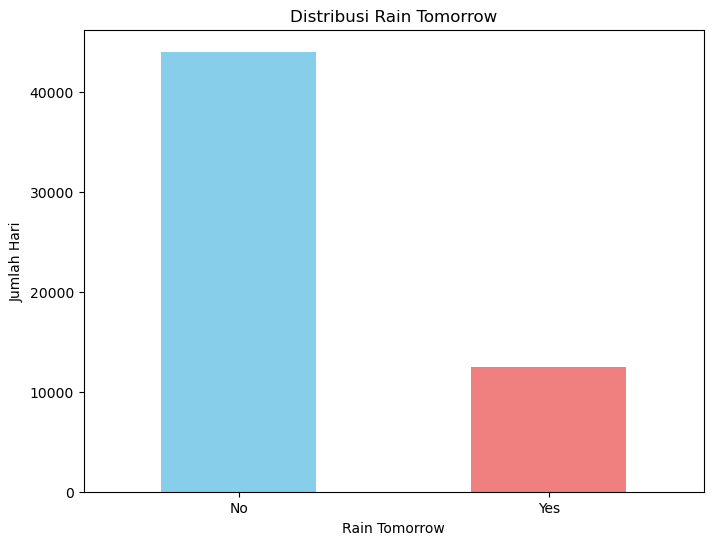

In [23]:
# Menghitung frekuensi RainTomorrow
rain_tomorrow_counts = df['RainTomorrow'].value_counts()

# Membuat bar plot
plt.figure(figsize=(8, 6))
rain_tomorrow_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribusi Rain Tomorrow')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Jumlah Hari')
plt.xticks(rotation=0)
plt.show()

## Jumlah Data Berdasarkan Musim

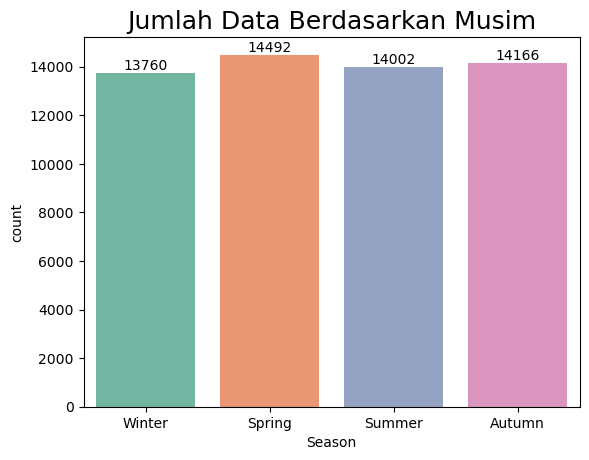

In [24]:
ax = sns.countplot(x='Season', data=df, palette='Set2')
ax.bar_label(ax.containers[0])
plt.title('Jumlah Data Berdasarkan Musim', fontsize=18)
plt.show()


## Distribusi Rainfall, Evaporasi, Winspeed9am, Windspeed3pm

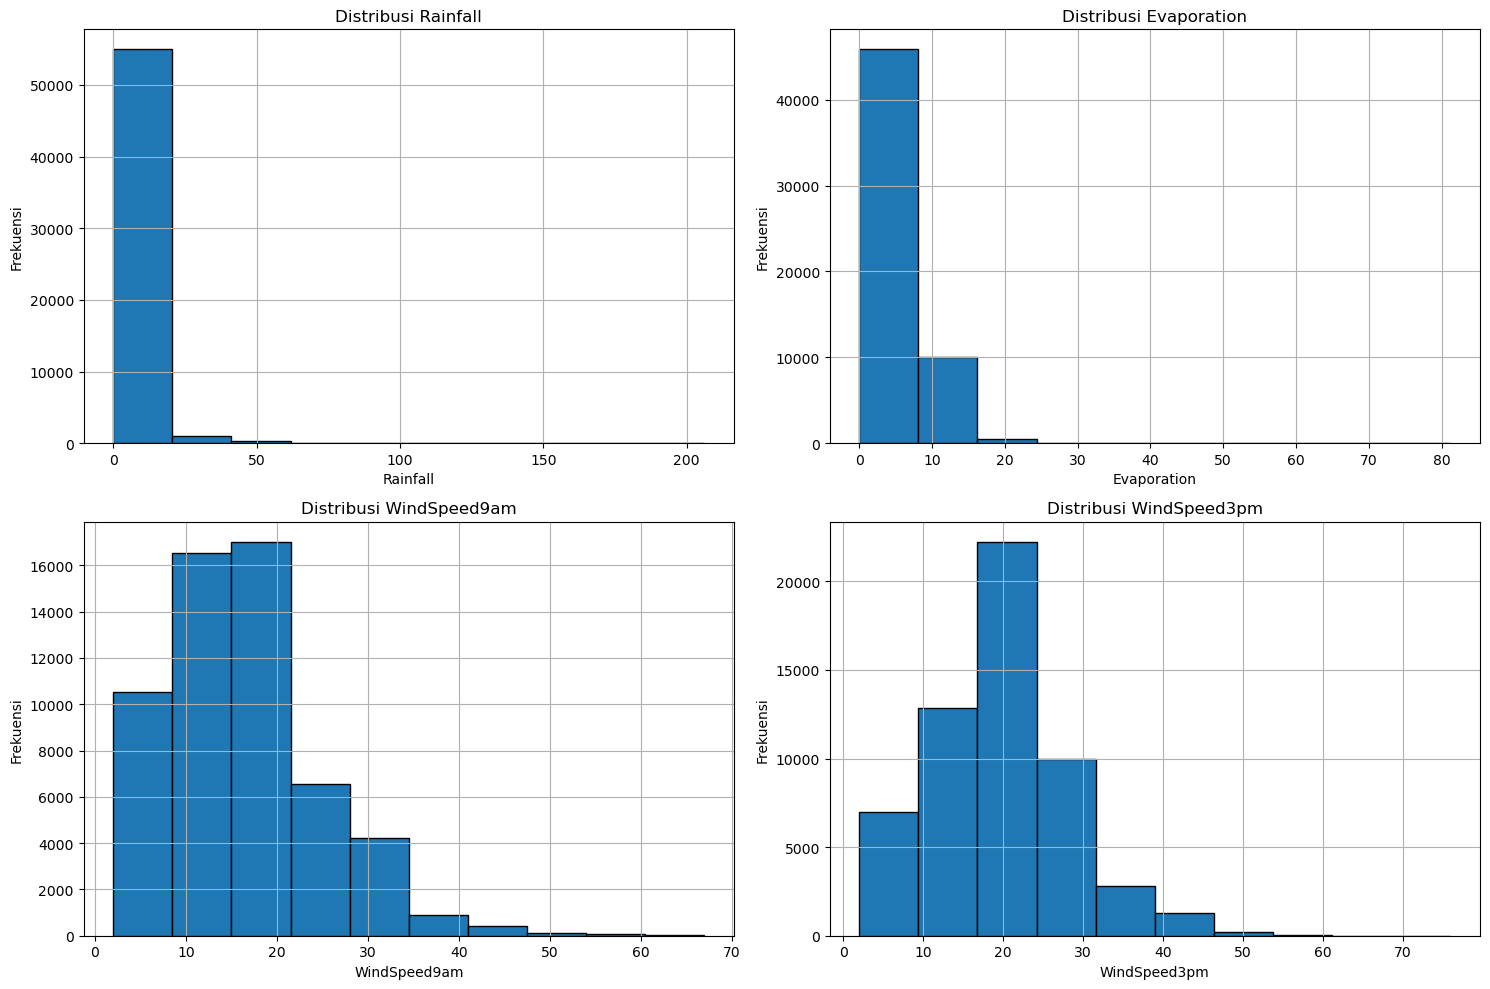

In [25]:
# Plot histogram untuk variabel Rainfall
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
df['Rainfall'].hist(bins=10, edgecolor='black')
plt.xlabel('Rainfall')
plt.ylabel('Frekuensi')
plt.title('Distribusi Rainfall')

# Plot histogram untuk variabel Evaporation
plt.subplot(2, 2, 2)
df['Evaporation'].hist(bins=10, edgecolor='black')
plt.xlabel('Evaporation')
plt.ylabel('Frekuensi')
plt.title('Distribusi Evaporation')

# Plot histogram untuk variabel WindSpeed9am
plt.subplot(2, 2, 3)
df['WindSpeed9am'].hist(bins=10, edgecolor='black')
plt.xlabel('WindSpeed9am')
plt.ylabel('Frekuensi')
plt.title('Distribusi WindSpeed9am')

# Plot histogram untuk variabel WindSpeed3pm
plt.subplot(2, 2, 4)
df['WindSpeed3pm'].hist(bins=10, edgecolor='black')
plt.xlabel('WindSpeed3pm')
plt.ylabel('Frekuensi')
plt.title('Distribusi WindSpeed3pm')

plt.tight_layout()
plt.show()


## Perubahan Suhu (MinTemp dan MaxTemp)

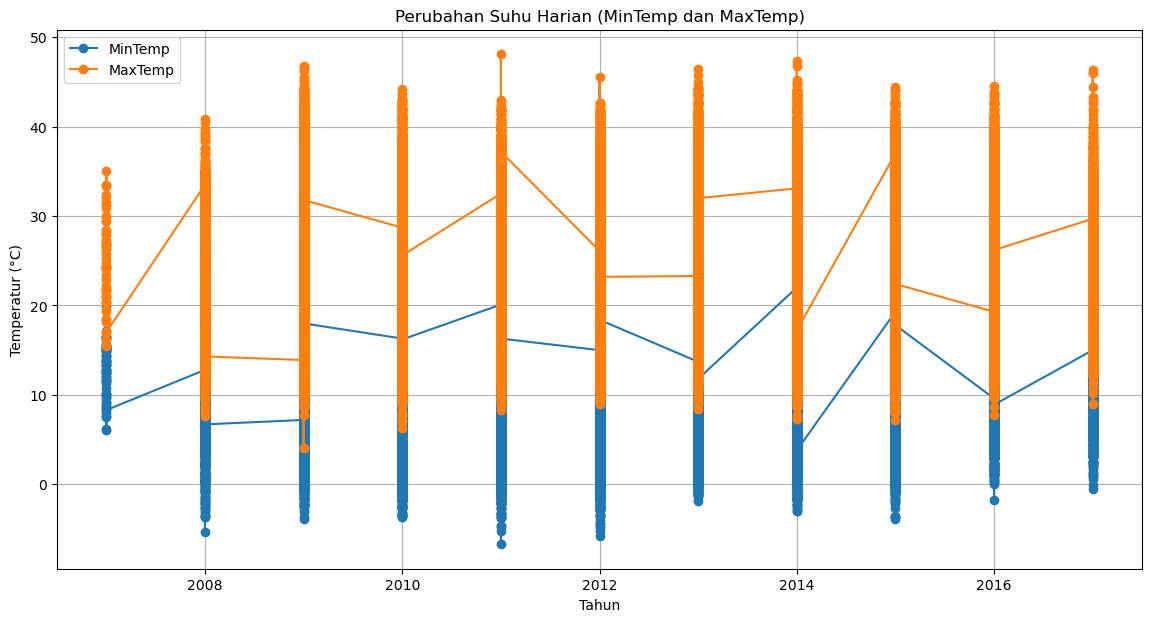

In [26]:
# Mengurutkan DataFrame berdasarkan kolom 'Date'
df.sort_values(by='Year', inplace=True)

# Plot time series untuk MinTemp dan MaxTemp
plt.figure(figsize=(14, 7))
plt.plot(df['Year'], df['MinTemp'], label='MinTemp', marker='o')
plt.plot(df['Year'], df['MaxTemp'], label='MaxTemp', marker='o')

plt.title('Perubahan Suhu Harian (MinTemp dan MaxTemp)')
plt.xlabel('Tahun')
plt.ylabel('Temperatur (°C)')
plt.legend()
plt.grid(True)
plt.show()


## Perbandingan Kecepatan Angin saat 9 am dan 3pm

Text(0, 0.5, 'Kecepatan Angin Sore (3pm)')

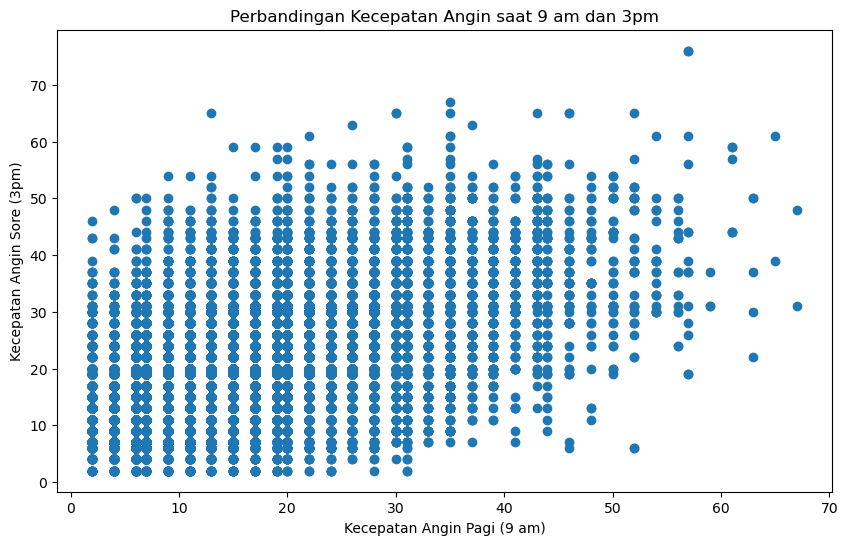

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(df['WindSpeed9am'], df['WindSpeed3pm'])
plt.title('Perbandingan Kecepatan Angin saat 9 am dan 3pm')
plt.xlabel('Kecepatan Angin Pagi (9 am)')
plt.ylabel('Kecepatan Angin Sore (3pm)')


## Hubungan Curah Hujan terhadap Prediksi Hujan Besok

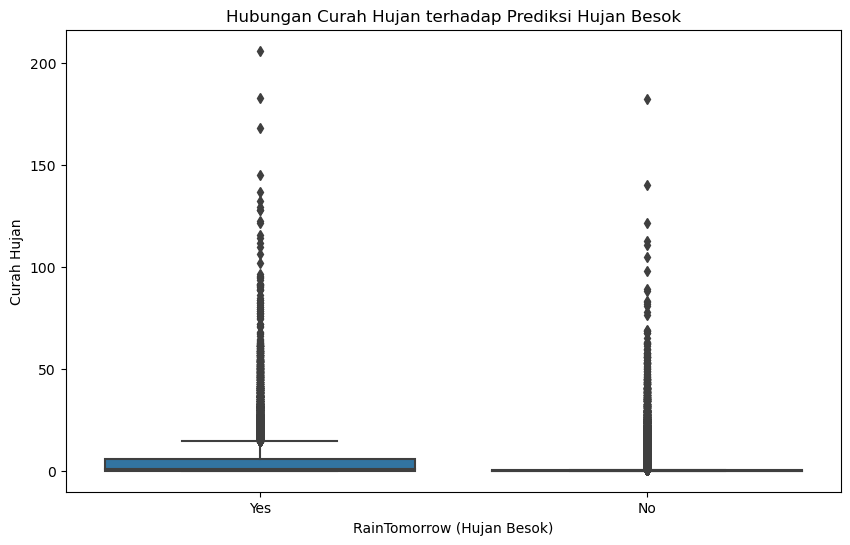

In [28]:
# Plot boxplot untuk Rainfall terhadap RainTomorrow
plt.figure(figsize=(10, 6))
sns.boxplot(x='RainTomorrow', y='Rainfall', data=df)
plt.title('Hubungan Curah Hujan terhadap Prediksi Hujan Besok')
plt.xlabel('RainTomorrow (Hujan Besok)')
plt.ylabel('Curah Hujan')
plt.show()


## Hubungan Evaporasi dengan Prediksi Hujan Besok

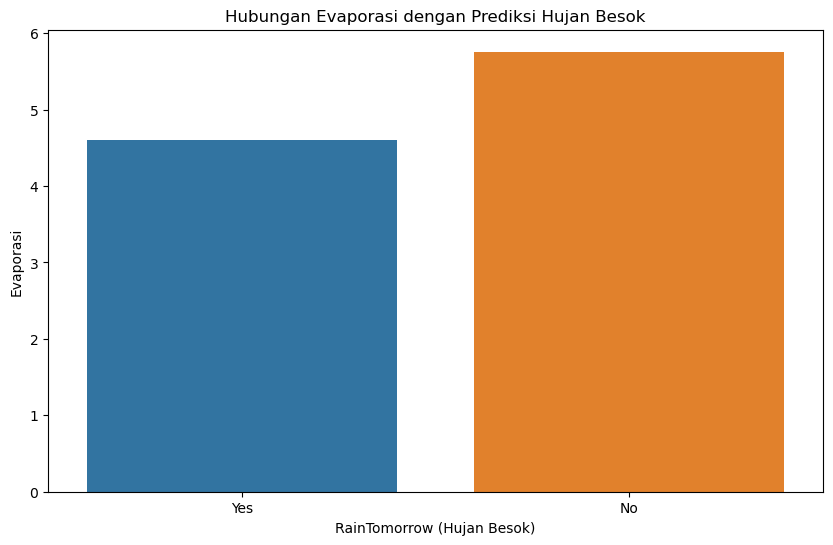

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x='RainTomorrow', y='Evaporation', data=df, ci=None)
plt.title('Hubungan Evaporasi dengan Prediksi Hujan Besok')
plt.xlabel('RainTomorrow (Hujan Besok)')
plt.ylabel('Evaporasi')
plt.show()


# Data Preprocessing

## Outlier

Outlier merupakan nilai yang jauh berbeda dengan nilai yang lain pada dataset. Nilai ini dapat menjadi masalah dan memengaruhi hasil analisis, sehingga nilai outlier perlu dihapus

In [30]:
# Mendeteksi outliers untuk variabel Rainfall

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Batas_Bawah = df.Rainfall.quantile(0.25) - (IQR * 3)
Batas_Atas = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Outlier pada variabel Rainfall adalah nilai < {lowerboundary} atau > {upperboundary}'.format(lowerboundary=Batas_Bawah, upperboundary=Batas_Atas))


Outlier pada variabel Rainfall adalah nilai < -1.7999999999999998 atau > 2.4


In [31]:
# Mendeteksi outliers untuk variabel Evaporation

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Batas_Bawah = df.Evaporation.quantile(0.25) - (IQR * 3)
Batas_Atas = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Outliers pada variabel Evaporation adalah nilai < {lowerboundary} atau > {upperboundary}'.format(lowerboundary=Batas_Bawah, upperboundary=Batas_Atas))


Outliers pada variabel Evaporation adalah nilai < -11.0 atau > 21.200000000000003


In [32]:
# Mendeteksi outliers untuk variabel WindSpeed9am

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Batas_Bawah = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Batas_Atas = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('Outlier pada variabel WindSpeed9am adalah nilai < {lowerboundary} atau > {upperboundary}'.format(lowerboundary=Batas_Bawah, upperboundary=Batas_Atas))


Outlier pada variabel WindSpeed9am adalah nilai < -24.0 atau > 53.0


In [33]:
# Mendeteksi Outliers untuk variabel WindSpeed3pm

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Batas_Bawah = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Batas_Atas = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('Outliers pada variabel WindSpeed3pm adalah nilai < {lowerboundary} atau > {upperboundary}'.format(lowerboundary=Batas_Bawah, upperboundary=Batas_Atas))


Outliers pada variabel WindSpeed3pm adalah nilai < -26.0 atau > 65.0


In [34]:
# Menghapus baris untuk WindSpeed3pm
df = df.loc[(df['WindSpeed3pm'] >= Batas_Bawah) & (df['WindSpeed3pm'] <= Batas_Atas)]

# Menghapus baris untuk WindSpeed9am
df = df.loc[(df['WindSpeed9am'] >= Batas_Bawah) & (df['WindSpeed9am'] <= Batas_Atas)]

# Menghapus baris untuk Evaporation
df = df.loc[(df['Evaporation'] >= Batas_Bawah) & (df['Evaporation'] <= Batas_Atas)]

# Menghapus baris untuk Rainfall
df = df.loc[(df['Rainfall'] >= Batas_Bawah) & (df['Rainfall'] <= Batas_Atas)]

In [35]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,Season
45632,Canberra,15.50,21.10,5.40,6.40,0.90,S,31.00,SSE,NE,6.00,7.00,93.00,86.00,1010.10,1008.60,8.00,8.00,16.60,20.00,Yes,Yes,2007,12,16,Winter
45623,Canberra,17.20,25.80,0.00,4.20,8.80,SW,41.00,NW,N,6.00,6.00,70.00,74.00,1014.50,1011.50,6.00,7.00,21.50,22.60,No,Yes,2007,12,7,Winter
45622,Canberra,16.30,26.80,0.00,6.00,6.30,ENE,39.00,ESE,ESE,13.00,9.00,78.00,54.00,1018.80,1016.10,8.00,7.00,18.60,24.50,No,No,2007,12,6,Winter
45621,Canberra,14.50,21.80,0.00,8.40,9.80,ENE,43.00,ESE,E,11.00,30.00,69.00,63.00,1015.00,1015.30,7.00,1.00,18.60,20.50,No,No,2007,12,5,Winter
45620,Canberra,13.30,26.50,6.60,3.80,11.80,NW,50.00,NW,WNW,20.00,26.00,74.00,40.00,1007.30,1006.30,5.00,2.00,18.80,25.10,Yes,No,2007,12,4,Winter


## Encoding

Pada Encoding, dataset tersebut diubah yang sebelumnya kategori/label menjadi numerik atau angka.

In [36]:
# Mengkategorikan data yang akan di Encoding
object_columns = df.select_dtypes(include=['object']).columns.tolist()
numeric_columns = df.select_dtypes(exclude=['object']).columns.tolist()
object_columns

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow',
 'Season']

In [37]:
numeric_columns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [38]:
# Mengetahui jumlah nilai unik pada tiap kolom
df[object_columns].nunique()

Location        26
WindGustDir     16
WindDir9am      16
WindDir3pm      16
RainToday        2
RainTomorrow     2
Season           4
dtype: int64

In [39]:
df[numeric_columns].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [40]:
df[object_columns].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
Season          0
dtype: int64

In [41]:
encoded_data = LabelEncoder()

for cat in object_columns:
        if cat in df[object_columns]:
            df[cat] = encoded_data.fit_transform(df[cat])

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,Season
45632,3,15.50,21.10,5.40,6.40,0.90,8,31.00,10,4,6.00,7.00,93.00,86.00,1010.10,1008.60,8.00,8.00,16.60,20.00,1,1,2007,12,16,3
45623,3,17.20,25.80,0.00,4.20,8.80,12,41.00,7,3,6.00,6.00,70.00,74.00,1014.50,1011.50,6.00,7.00,21.50,22.60,0,1,2007,12,7,3
45622,3,16.30,26.80,0.00,6.00,6.30,1,39.00,2,2,13.00,9.00,78.00,54.00,1018.80,1016.10,8.00,7.00,18.60,24.50,0,0,2007,12,6,3
45621,3,14.50,21.80,0.00,8.40,9.80,1,43.00,2,0,11.00,30.00,69.00,63.00,1015.00,1015.30,7.00,1.00,18.60,20.50,0,0,2007,12,5,3
45620,3,13.30,26.50,6.60,3.80,11.80,7,50.00,7,14,20.00,26.00,74.00,40.00,1007.30,1006.30,5.00,2.00,18.80,25.10,1,0,2007,12,4,3


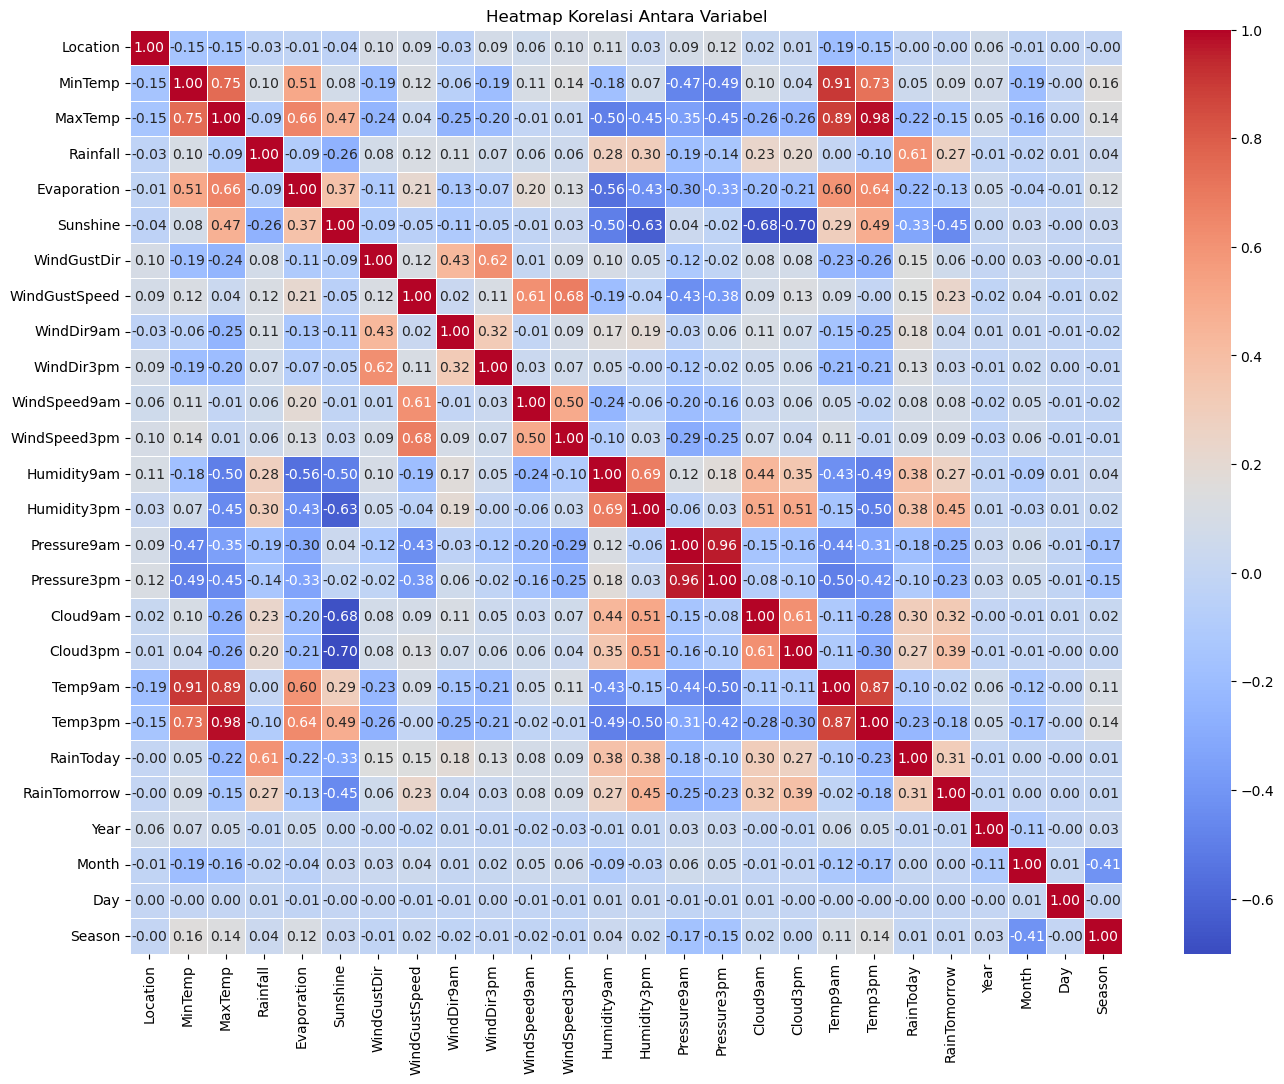

In [42]:
correlation_matrix = df.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi Antara Variabel')
plt.show()

In [43]:
# Menghapus data-data yang memiliki korelasi kecil
df = df.drop(columns=['Year', 'Month', 'Day', 'Season', 'Location', 'Evaporation', 'Sunshine'])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56330 entries, 45632 to 142302
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        56330 non-null  float64
 1   MaxTemp        56330 non-null  float64
 2   Rainfall       56330 non-null  float64
 3   WindGustDir    56330 non-null  int32  
 4   WindGustSpeed  56330 non-null  float64
 5   WindDir9am     56330 non-null  int32  
 6   WindDir3pm     56330 non-null  int32  
 7   WindSpeed9am   56330 non-null  float64
 8   WindSpeed3pm   56330 non-null  float64
 9   Humidity9am    56330 non-null  float64
 10  Humidity3pm    56330 non-null  float64
 11  Pressure9am    56330 non-null  float64
 12  Pressure3pm    56330 non-null  float64
 13  Cloud9am       56330 non-null  float64
 14  Cloud3pm       56330 non-null  float64
 15  Temp9am        56330 non-null  float64
 16  Temp3pm        56330 non-null  float64
 17  RainToday      56330 non-null  int32  
 18  R

In [45]:
# Menyimpan DataFrame ke dalam file pickle
df.to_pickle('df.pkl')

## Normalization

In [46]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

In [47]:
# Memisahkan variabel independen (X) dan variabel dependen (y)
X = df.drop(columns='RainTomorrow', axis=1)
y = df['RainTomorrow']


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Pendefinisian Model

Setelah dilakukan data cleaning dan data preprocessing, data tersebut kemudian akan digunakan untuk pelatihan model. Model yang akan dipakai pada project ini adalah Support Vector Machine dan Linear Regression. Support Vector Machine adalah algoritma yang dikenal karena kemampuannya dalam menangani data dengan baik, terutama dalam pemisahan dua kelas atau lebih. Sedangkan Linear Regression adalah algoritma yang menggunakan prinsip regresi yang paling sederhana dan banyak digunakan serta kemudahan dalam interpretasi hasil.

In [49]:
# Membuat model SVM
svm = SVC(kernel='rbf', C=1.0)

In [50]:
# Membuat model Logistic Regression
lr = LinearRegression()

# Pelatihan Model

Pelatihan model merupakan proses untuk menjalankan algoritma yang didalamnya sudah terbagi menjadi data training untuk mendapatkan output tertentu

In [51]:
#Melatih data
svm.fit(X_train, y_train)

SVC()

In [52]:
lr.fit(X_train, y_train)

LinearRegression()

In [53]:
# Prediksi data pada svm
y_pred_svm = svm.predict(X_test)

In [54]:
# Prediksi data pada logistic regression
y_pred_lr = lr.predict(X_test)

# Evaluasi Model

Evaluasi model merupakan menguji akurasi dari data testing. Evaluasi dilakukan dengan menggunakan akurasi (accuracy), presisi (precision), recall, F1-score, dan matriks konfusi. semakin tinggi akurasi, presisi, recall, dan F1-score, maka model akan semakin baik.

In [55]:
# Evaluasi model svm
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)

In [56]:
# Evaluasi model Logistic Regression
accuracy_lr = mean_squared_error(y_test, y_pred_lr)
classification_report_lr = r2_score(y_test, y_pred_lr)

In [57]:
# Hasil Evaluasi model SVM
print("SVM Accuracy:", accuracy_svm)
print("SVM Classification Report:\n", classification_report_svm)

SVM Accuracy: 0.8376235280194094
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.98      0.90     13158
           1       0.85      0.33      0.47      3741

    accuracy                           0.84     16899
   macro avg       0.84      0.65      0.69     16899
weighted avg       0.84      0.84      0.81     16899



In [58]:
# Hasil Evaluasi model Logistic Regression
print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Classification Report:\n", classification_report_lr)

Logistic Regression Accuracy: 0.11058818568351635
Logistic Regression Classification Report:
 0.3584165468171655


# Model Inference

Model Inference merupakan pelatihan model yang kita buat dengan data selain data yang sudah tersedia. Model tersebut kita latih dengan data yang telah dibuat seperti dibawah ini.

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56330 entries, 45632 to 142302
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        56330 non-null  float64
 1   MaxTemp        56330 non-null  float64
 2   Rainfall       56330 non-null  float64
 3   WindGustDir    56330 non-null  int32  
 4   WindGustSpeed  56330 non-null  float64
 5   WindDir9am     56330 non-null  int32  
 6   WindDir3pm     56330 non-null  int32  
 7   WindSpeed9am   56330 non-null  float64
 8   WindSpeed3pm   56330 non-null  float64
 9   Humidity9am    56330 non-null  float64
 10  Humidity3pm    56330 non-null  float64
 11  Pressure9am    56330 non-null  float64
 12  Pressure3pm    56330 non-null  float64
 13  Cloud9am       56330 non-null  float64
 14  Cloud3pm       56330 non-null  float64
 15  Temp9am        56330 non-null  float64
 16  Temp3pm        56330 non-null  float64
 17  RainToday      56330 non-null  int32  
 18  R

In [60]:
df.sample(3)

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
104849,7.00,12.00,1.50,13,63.00,14,15,24.00,35.00,97.00,86.00,1017.70,1014.20,8.00,7.00,8.70,9.70,1,1
137487,24.30,38.20,0.00,11,54.00,1,11,19.00,20.00,21.00,16.00,1008.20,1006.00,7.00,5.00,31.50,35.50,0,0
137312,-0.10,17.20,0.00,10,39.00,10,9,17.00,20.00,56.00,32.00,1027.00,1023.80,1.00,0.00,10.10,15.60,0,0


In [61]:
# Membuat data baru yang nantinya akan diuji pada model yang telah dibuat
df_new = {
    'MinTemp' : [11.40, 23.40, 9.60],
    'MaxTemp' : [24.50, 30.90, 18.60],
    'Rainfall' : [0.20, 0.00, 0.00],
    'WindGustDir' : [4, 4, 8],
    'WindGustSpeed' : [28.00, 33.00, 30.00],
    'WindDir9am' : [15, 1, 15],
    'WindDir3pm': [4, 1, 8],
    'WindSpeed9am' : [4.00, 20.00, 13.00],
    'WindSpeed3pm' : [11.00, 24.00, 22.00],
    'Humidity9am' : [72.00, 63.00, 63.00],
    'Humidity3pm' : [56.00, 52.00, 63.00],
    'Pressure9am' : [1018.50, 1019.30, 1029.20],
    'Pressure3pm' : [1014.20, 1015.70, 1026.20],
    'Cloud9am' : [5.00, 4.00, 7.00],
    'Cloud3pm' : [3.00, 1.00, 3.00],
    'Temp9am' : [16.60, 27.30, 15.50],
    'Temp3pm' : [22.40, 28.30, 17.70],
    'RainToday' : [1, 1, 1]
}
data_uji = pd.DataFrame(df_new)
data_uji

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,11.40,24.50,0.20,4,28.00,15,4,4.00,11.00,72.00,56.00,1018.50,1014.20,5.00,3.00,16.60,22.40,1
1,23.40,30.90,0.00,4,33.00,1,1,20.00,24.00,63.00,52.00,1019.30,1015.70,4.00,1.00,27.30,28.30,1
2,9.60,18.60,0.00,8,30.00,15,8,13.00,22.00,63.00,63.00,1029.20,1026.20,7.00,3.00,15.50,17.70,1


In [62]:
scaler = StandardScaler()
data_uji = scaler.fit_transform(data_uji)

In [63]:
list(data_uji)

[array([-0.55506968, -0.03318178,  1.41421356, -0.70710678, -1.13554995,
         0.70710678, -0.11624764, -1.2724665 , -1.39970842,  1.41421356,
        -0.21997067, -0.78770819, -0.84292723, -0.26726124,  0.70710678,
        -0.60124606, -0.09223677,  0.        ]),
 array([ 1.40399977,  1.24099859, -0.70710678, -0.70710678,  1.29777137,
        -1.41421356, -1.16247639,  1.17066918,  0.87481777, -0.70710678,
        -1.09985336, -0.62331691, -0.56195149, -1.06904497, -1.41421356,
         1.40917045,  1.26825556,  0.        ]),
 array([-0.84893009, -1.20781681, -0.70710678,  1.41421356, -0.16222142,
         0.70710678,  1.27872403,  0.10179732,  0.52489066, -0.70710678,
         1.31982404,  1.4110251 ,  1.40487872,  1.33630621,  0.70710678,
        -0.80792439, -1.17601879,  0.        ])]

In [64]:
from sklearn import svm

# Create an SVM classifier object
svm_classifier = svm.SVC()

# Train the SVM classifier using your training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
svm_predictions = svm_classifier.predict(X_test)

# Print the predictions
print('SVM Predictions:')
print(svm_predictions)

SVM Predictions:
[0 0 0 ... 1 0 1]


# Kesimpulan

Berdasarkan analisis yang telah kami lakukan dapat disimpulkan :
- Variabel yang memengaruhi besok akan terjadi hujan atau tidak adalah temperatur/suhu, curah hujan, arah kecepatan angin, kecepatan angin, humiditas, tekanan udara, presentase langit/awan.
- Model SVM memiliki akurasi sebesar 0.84 dengan presisi terjadinya hujan esok hari sebesar 0.82
- Model Logistic Regression memiliki akurasi sebesar 0.11 dengan presisi terjadinya hujan esok hari sebesar 0.34